In [1]:
import pandas as pd

# Load data

In [2]:
df = pd.read_csv('data/name_gender.csv')

In [29]:
df.head()

,NAMA,GENDER
0,ORIZA ZEA SABRINA,P
1,AYU AGA PUTRI,P
2,SUSYANTO,L
3,YAHUDIN,L
4,WAGIMAN,L


# Encoding dengan menggunakan fast text

In [4]:
import os
from tqdm.auto import tqdm

from nltk.tokenize import word_tokenize
from gensim.models import FastText

In [5]:
# tokenisasi nama
sentences = [word_tokenize(text.lower()) for text in tqdm (df.NAMA)]
sentences[:5]

[['oriza', 'zea', 'sabrina'],
 ['ayu', 'aga', 'putri'],
 ['susyanto'],
 ['yahudin'],
 ['wagiman']]

# Train2Vec

In [6]:
# ukuran size = latent space = 16, 32, dll . Di industry size 100, sedang = 200, wikipedia =300
# window lihat ke kiri atau kekanan seberapa banyak
# min_count = berapa banyak kata yang muncul agar dijadikan word yang ditraining
#sg = skip gram , by default dia false
model = FastText(sentences, size = 128, window = 5, min_count =3 , workers = 4, iter = 1000, sg=0, hs = 0)

In [7]:
os.makedirs("model/fasttext/", exist_ok= True)
model.save("model/fasttext/name_gender.fasttext")

# Model information

In [8]:
w2v = model.wv

In [9]:
w2v.index2word

['sri',
 '.',
 'sari',
 'siti',
 'dwi',
 'tri',
 'saputra',
 'putra',
 'dewi',
 'm.',
 'putri',
 'agus',
 'muhammad',
 'eka',
 'hidayat',
 'nur',
 'lestari',
 'rahayu',
 'wati',
 'susanto',
 'suryani',
 'fitri',
 'ningsih',
 'ahmad',
 'pratama',
 'kurniawan',
 'indah',
 'eko',
 'ayu',
 'astuti',
 'puspita',
 'indra',
 'ratna',
 'supardi',
 'wulandari',
 'anggraini',
 'sulastri',
 's',
 'gunawan',
 'abdul',
 'rini',
 'maria',
 'muhamad',
 'irawan',
 'ari',
 'dian',
 'endang',
 'adi',
 'susanti',
 'dedi',
 'joko',
 'widodo',
 'wahyu',
 'puji',
 'santoso',
 'pratiwi',
 'rahmat',
 'rahmad',
 'budi',
 'hartati',
 'sumarni',
 'teguh',
 'yanto',
 'ria',
 'utami',
 'simanjuntak',
 'suparno',
 'rizki',
 'agung',
 'heri',
 'slamet',
 'm',
 'riki',
 'a.',
 'abdullah',
 'setiawan',
 'arif',
 'purwanti',
 'ali',
 'sugiarti',
 'gusti',
 'wijaya',
 'aini',
 'kurnia',
 'ramadhan',
 'susi',
 'susilawati',
 'juni',
 'candra',
 'tampubolon',
 's.',
 'ade',
 'yuni',
 'retno',
 'jumadi',
 'sanjaya',
 'supa

# Klasifikasi

In [30]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.utils import save_model, load_model

In [31]:
from nltk.tokenize import word_tokenize
from gensim.models import FastText

In [32]:
w2v = FastText.load("model/fasttext/name_gender.fasttext").wv

In [33]:
def norm_sent_vector(sentence, w2v_model):
    vecs = [w2v_model[word.lower()] for word in word_tokenize (sentence)]    
    norm_vecs = [vec/ np.linalg.norm(vec) for vec in vecs if np.linalg.norm(vec > 0)]
    sent_vec = np.mean (vecs, axis = 0) #dari arah baris
    return sent_vec

# Dataset splitting

In [34]:
vecs = [norm_sent_vector (sentence, w2v) for sentence in df.NAMA]
vecs = np.array(vecs)
vecs

array([[-0.03713789,  0.04408956,  0.0595936 , ...,  0.03668824,
        -0.00442444, -0.02635326],
       [ 0.16947742, -0.01472055, -0.39452276, ..., -0.20199938,
         0.32219604,  0.01255939],
       [ 0.396016  , -0.2163517 , -0.34514114, ...,  0.1806434 ,
        -0.2973108 , -0.16706   ],
       ...,
       [ 0.19676988, -0.05929204, -0.28069752, ...,  0.11157163,
        -0.08208302, -0.09180789],
       [-0.34648827, -0.32200286, -0.6952971 , ...,  0.24114665,
         0.22921592, -0.15547477],
       [-0.12261731, -0.06312078, -0.80349857, ...,  0.00768568,
        -0.46103504, -0.06797558]], dtype=float32)

Contoh representasi nama --> vector 128

In [35]:
df.NAMA[0], vecs[0]

('ORIZA ZEA SABRINA',
 array([-0.03713789,  0.04408956,  0.0595936 , -0.06804708, -0.090105  ,
         0.10275188, -0.11025815,  0.00533339, -0.12279415,  0.0438692 ,
        -0.02089555, -0.14931358,  0.02039015,  0.03154417, -0.1027438 ,
        -0.02859107,  0.0438357 ,  0.04288588, -0.1360405 ,  0.04247766,
        -0.1518076 , -0.09742796, -0.02984287,  0.1453505 , -0.0179162 ,
         0.11539805, -0.01178677,  0.09705323, -0.05600392,  0.13385952,
        -0.08327112, -0.01160394,  0.04201695,  0.00274372,  0.01283245,
         0.05339225,  0.08125683,  0.02266148, -0.13009316,  0.06945883,
         0.17135243, -0.02856371, -0.00195224,  0.01088363, -0.10207435,
         0.05112273,  0.11240771,  0.10208172, -0.06732512, -0.00262202,
         0.18021657,  0.17525594,  0.02550816,  0.07681409,  0.03018261,
         0.00996539,  0.01732793,  0.01899868, -0.00569085, -0.06817273,
        -0.03428501, -0.00229794, -0.11541342,  0.03843896, -0.01930622,
         0.02012593, -0.07177

In [37]:
X = vecs
y = df.GENDER

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2511, 128), (628, 128), (2511,), (628,))

# Training

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [39]:
pipeline = Pipeline([
    ('algo', SVC(max_iter=500))
])


model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=4, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   30.9s finished
C:\Users\dharm\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


{'algo__C': 1.368979599359222, 'algo__gamma': 0.36749049453053273}
0.9267224213460773 0.8721663923851319 0.9124203821656051


# Evaluation

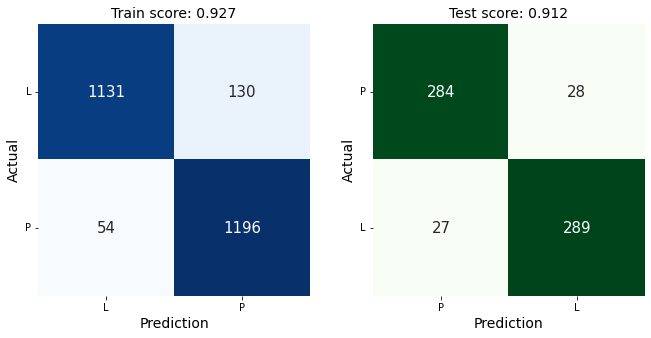

In [43]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

# Save model & use model to predict new data

In [20]:
save_model(model,'name_to_gender.pkl')

Model is pickled as model/name_to_gender.pkl


# Import model

In [21]:
model = load_model('model/name_to_gender.pkl')

In [42]:
name = ["Jokowi Dodo"]

vecs_name = [norm_sent_vector (sentence.lower(), w2v) for sentence in name]
vecs_name = np.array(vecs_name)
model.predict(vecs_name)

array(['L'], dtype=object)